**Author:** Kaetlyn Gibson

**Bio 399**
    
**Homework 5**

# Question 1:
In class we looked at Principle Component Analysis as a way to do unsupervised dimensionality reduction and visualization of complex data. For this week I would like to turn you guys lose on using PCA on a new genetics dataset – again this could be excellent training for your final project.

After reading Lior's blog post, reproduce  the  PCA  figures  in  that  post. I’ve  downloaded  the SNP  data  and  the  meta  data  for  you. You  can  find  them  in data/pachter_human_snps.txt and data/pachter_meta.txt.

note: the first row of the SNP data is for Pachter’s “perfect human”.  If you include that in your PCA plot you should change it’s marker or color or somehow indicate that it is different.

In [1]:
# import statements
import sklearn
from sklearn import decomposition
from sklearn.impute import SimpleImputer
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# get snp data
snp = pd.read_csv("data/pachter_human_snps.txt","\t")
# rename first column
snp.rename(columns = {'Unnamed: 0':'sampleID'}, inplace = True)
# view head
snp.head()

,sampleID,rs307377,rs7366653,rs41307846,rs3753242,rs35082957,rs34154371,rs35426403,rs1143016,rs3890745,...,rs6007897,rs9615362,rs9627183,rs28372448,rs121913039,rs121913037,rs5770917,rs6151429,rs743616,rs2071421
0,perfect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HG00096,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,HG00097,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,HG00099,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,HG00100,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# imputation routine
imp = SimpleImputer()
snp_i = imp.fit_transform(snp.drop('sampleID',axis=1))

In [4]:
# get snp_meta data
snp_meta = pd.read_csv('data/pachter_meta.txt', "\t")
# do stuff with weird columns 
snp_meta.rename(columns = {'sample':'sampleID'}, inplace = True) # doing weird thing w/ "sample" method in code below
del snp_meta['Unnamed: 4']
del snp_meta['Unnamed: 5']
# view head
snp_meta.head()


,sampleID,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male


In [5]:
# filter out those individuals not in metadata
filt = snp.sampleID.isin(snp_meta.sampleID)
snp_filt_m = snp[filt]

In [6]:
# make color dict from super_pop
cdict = {}
current_palette = sns.color_palette()
for i,x in enumerate(snp_meta.super_pop.unique()):
    cdict[x] = current_palette[i]

In [7]:
# associate IDs with super_pop in dict
bridge = {}
for idx, row in snp_meta.iterrows():
    bridge[row.sampleID] = row.super_pop

In [8]:
samp_supop_cols = []
supop_name = []
keys = bridge.keys()
for idx, row in snp_filt_m.iterrows():
    samp_supop_cols.append(cdict[bridge[row.sampleID]])
    supop_name.append(bridge[row.sampleID])
 
supop_name[0] = 'OPT' # isolate perfect

In [9]:
snp_i = imp.fit_transform(snp_filt_m.drop('sampleID',axis=1))

# Perform the PCA again retaining only the top 2 components
sklearn_pca = sklearn.decomposition.PCA(n_components=3)
sklearn_pca.fit(snp_i)

# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(sklearn_pca.transform(snp_i),
                     columns=['PC1', 'PC2', 'PC3'])

# Create a column for species name
df_2D['sampleID'] = snp['sampleID']
df_2D['col'] = samp_supop_cols
df_2D['super_pop'] = supop_name

# Take a look at df_2D
df_2D.head()

,PC1,PC2,PC3,sampleID,col,super_pop
0,-1.249362,-9.201999,1.328914,perfect,"(0.12156862745098039, 0.4666666666666667, 0.70...",OPT
1,-1.812107,-8.690002,8.537342,HG00096,"(0.12156862745098039, 0.4666666666666667, 0.70...",EUR
2,-1.881935,-8.907442,2.132504,HG00097,"(0.12156862745098039, 0.4666666666666667, 0.70...",EUR
3,-1.176205,-9.935943,1.901721,HG00099,"(0.12156862745098039, 0.4666666666666667, 0.70...",EUR
4,-1.896889,-9.280170,-1.859181,HG00100,"(0.12156862745098039, 0.4666666666666667, 0.70...",EUR


Variance percent explained
 [0.09080005 0.07390606 0.01213116]


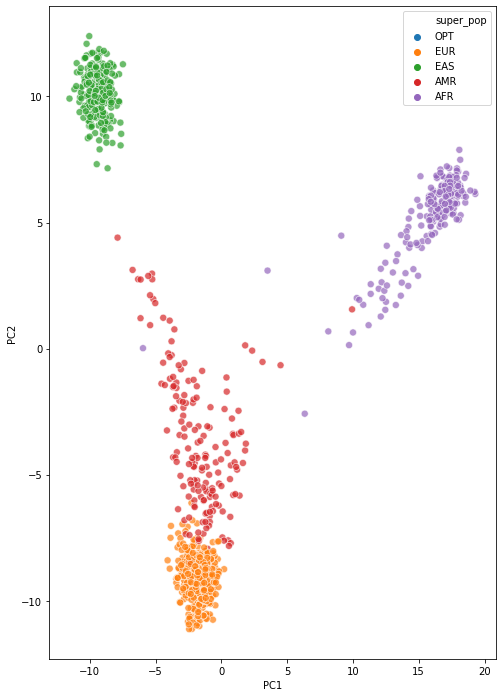

In [10]:
# plot!
plt.figure(figsize=(8,12))
sns.scatterplot(df_2D.PC1, df_2D.PC2, alpha=0.7, s=50, hue=df_2D.super_pop)

print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)

I think I'm missing some dots (where is the blue perfect dot?)... but it looks like the 3rd graph! Which is weird since Lior's 3rd graph uses PC2 and PC3...

Variance percent explained
 [0.09080005 0.07390606 0.01213116]


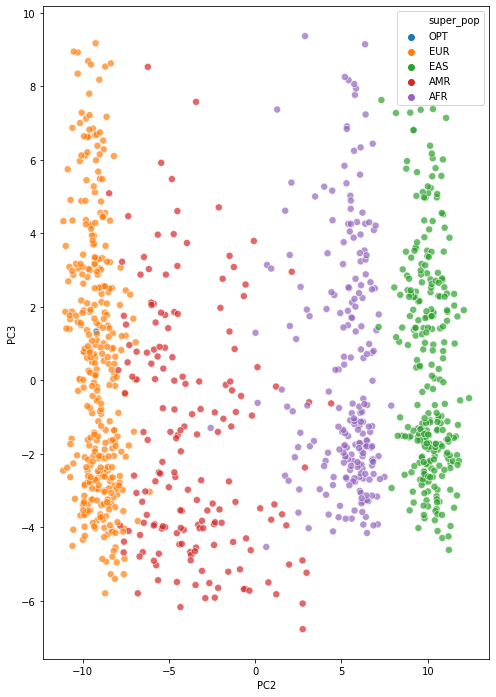

In [11]:
# plot!
plt.figure(figsize=(8,12))
sns.scatterplot(df_2D.PC2, df_2D.PC3, alpha=0.7, s=50, hue=df_2D.super_pop)

print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)

But my PC2 and PC3 graph looks like this... (you can see the blue perfect dot near the 2 on the PC3 axis, though!)

Variance percent explained
 [0.09080005 0.07390606 0.01213116]


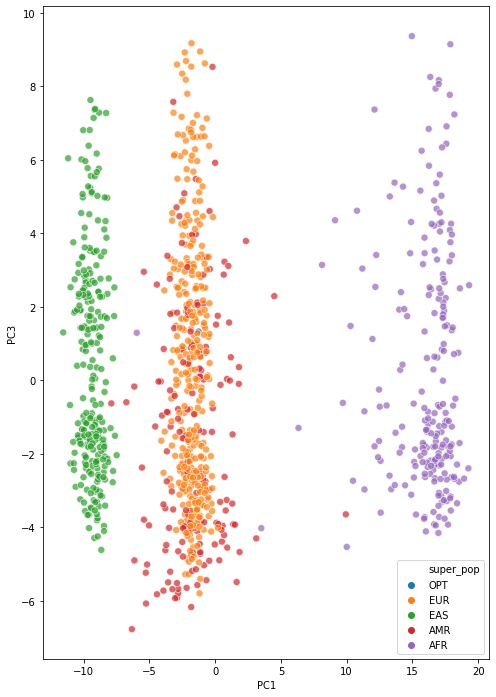

In [12]:
# plot!
plt.figure(figsize=(8,12))
sns.scatterplot(df_2D.PC1, df_2D.PC3, alpha=0.7, s=50, hue=df_2D.super_pop)

print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)

And my PC1, PC3 graph looks like this...(hey, you can see the blue perfect dot in the orange cluster!).

Hmmm

**Attempting a 1D graph based on discussion...**

In [13]:
# Perform the PCA again retaining only the top component
sklearn_pca = sklearn.decomposition.PCA(n_components=1)
sklearn_pca.fit(snp_i)

df_1D = pd.DataFrame(sklearn_pca.transform(snp_i),
                     columns=['projection'])
# Add back the species column
df_1D['super_pop'] = supop_name
df_1D.head()

,projection,super_pop
0,-1.249362,OPT
1,-1.812107,EUR
2,-1.881935,EUR
3,-1.176205,EUR
4,-1.896889,EUR


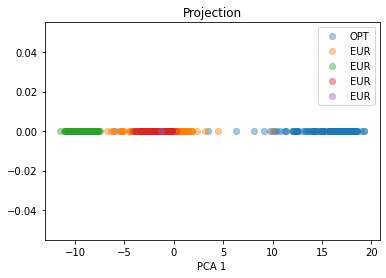

In [14]:
# plot!
for key, group in df_1D.groupby(['super_pop']):
    plt.plot(group['projection'], np.zeros_like(group['projection']), alpha=0.4, 
             label=key, marker='o', linestyle='none')

plt.margins(0.05)
plt.xlabel('PCA 1')
plt.legend(np.array(supop_name))
plt.title('Projection');

Hey, that's pretty cool!